In [20]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import SelectShapeStd

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# **Matrix_Operator_Approximate_ConvexHull_Algorithm**

1. Math operations with matrices
    * *1.1. Resize (Interpolation Applications)*
    * *1.2. Reshape (Diff with resize)*
    * *1.3. Transpose (Matrix Transpose)*
    * *1.4. squeeze (Decrease Dimention)*
    * *1.5. expand_dims (Increase Dimention)*
2. Create ROI as Rectangle 
3. Create ROI as Polygon
4. Approximate Contour (Algorithm)
5. ConvexHull Contour (Algorithm)

## Resize

(635, 952)
(600, 800)


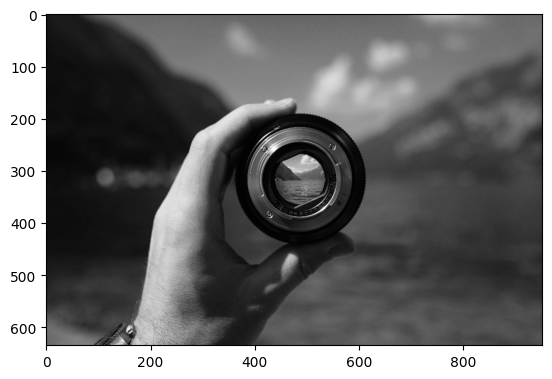

In [21]:
img = cv2.imread("images/lens.png",0)
print(img.shape)
show(img)

img_resized = cv2.resize(img, (800,600))
print(img_resized.shape)
show(img)

## Reshape

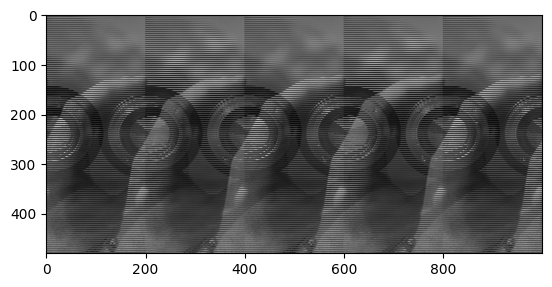

In [22]:
img_reshape = np.reshape(img_resized ,(480,1000))
show(img_reshape)

index:4
[476 192]


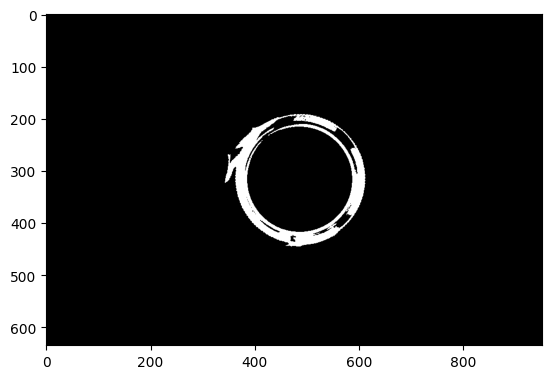

In [23]:
from function import SelectShapeStd


_, threshold = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)

biggest = SelectShapeStd(threshold, "area")
contours, _ = cv2.findContours(biggest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
point = contours[0][0][0]  
print(point)
show(biggest)

## Squeeze

In [24]:
contours_squezee = np.squeeze(contours)
point = contours_squezee[0]
print(point)
contours

[476 192]


(array([[[476, 192]],
 
        [[475, 193]],
 
        [[474, 193]],
 
        ...,
 
        [[479, 192]],
 
        [[478, 192]],
 
        [[477, 192]]], dtype=int32),)

## Expend_dims

In [50]:
contours_expend = np.expand_dims(contours, axis=0)
point = contours_expend[0][0]
print(point)

[[[476 192]]

 [[475 193]]

 [[474 193]]

 ...

 [[479 192]]

 [[478 192]]

 [[477 192]]]


## Transpose

In [ ]:
contours[0]

In [27]:
cnt = contours[0]
cnt_transpose = np.transpose(cnt)
cnt_transpose = np.squeeze(cnt_transpose)

moment =cv2.moments(cnt)
point_center = [
    moment["m10"] / moment["m00"], 
    moment["m01"] / moment["m00"]
]

distance = np.sqrt((cnt_transpose[0] - point_center[0])**2 + (cnt_transpose[1] - point_center[1])**2)

distance
print(f'max distance from contour -> center : {np.max(distance)}')
print(f'min distance from contour -> center : {np.min(distance)}')

max distance from contour -> center : 143.8768974873649
min distance from contour -> center : 120.747891991712


# **Math operations with matrices**

# **Create ROI as Rectangle**

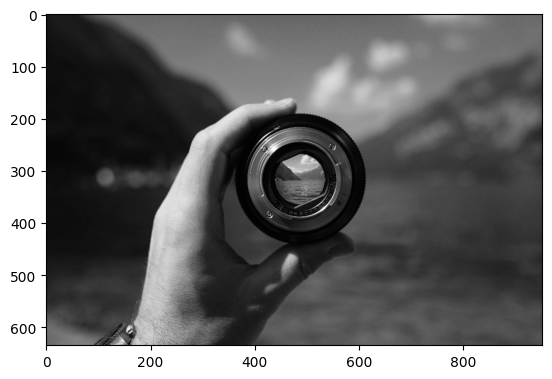

In [28]:
show(img)

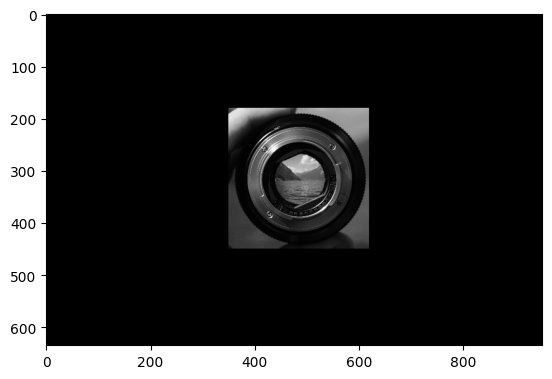

In [29]:
img 
mask = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)

mask[180:450 , 350:620] = 255
reduce_image = cv2.bitwise_and(mask, img)

show(reduce_image)

# **Create ROI as Polygon**

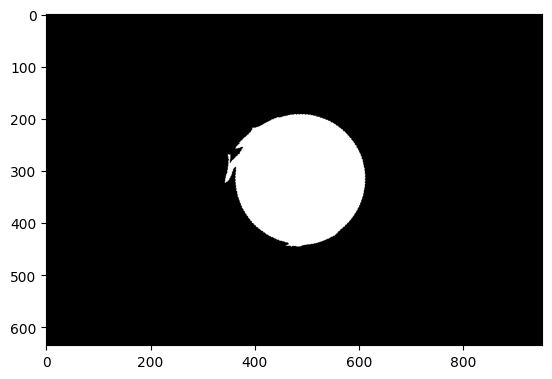

In [30]:
array_point =  np.array([
    [350,150],[600, 140],[620, 480],[350,420]
])

mask = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)

cv2.fillPoly(mask, [contours[0]], (255))
reduce_image = cv2.bitwise_and(mask, img)
show(mask)

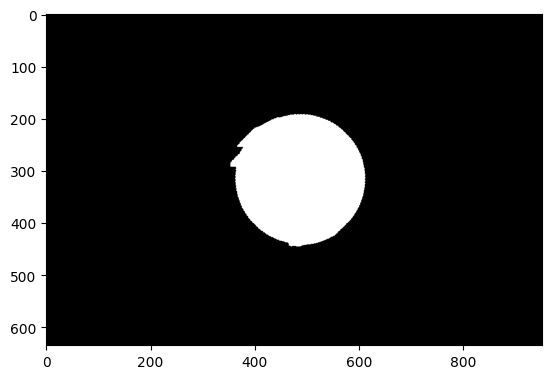

In [31]:
from function import OpeningCircle
opening= OpeningCircle(mask, 11)
show(opening)

# **Approximate Contour (Algorithm)**
link [https://cartography-playground.gitlab.io/playgrounds/douglas-peucker-algorithm/]

In [32]:
        
def contour_to_list_point(cnt):
    list_point=[]
    for p in cnt.tolist():
        
        new_point = tuple(p[0])
        list_point.append(new_point)

    return list_point

In [33]:
def distance_point_to_line(p1, line):
    A, B, C  = line
    x1, y1 = p1
    
    # Tim duong thang di qua point p1 va vuong goc voi line 
    line_perpendicular = find_perpendicular_line(p1, line)
    
    # Tim giao diem giua 2 duong thang 
    # point_intersec = line_intersection(line, line_perpendicular)
    
    dis_min = abs(A*x1 + B*y1 +C) /  math.sqrt(A**2 + B**2)
    return dis_min

def find_formula_line(point1, point2):
    # song song voi truc Ox thi y = nhau
    x1,y1 = point1
    x2,y2= point2

    if y1 == y2:
        A = 0
        B = 1
        C = - y1

    # song song voi truc Oy thi x = nhau
    elif x1 == x2:
        A = 1
        B = 0
        C = - x1
     
    # cat ox, oy   
    else:
        A = (y1 - y2)/(x1-x2)
        B = -1
        C = y2 - A * x2

    return A, B, C


def find_perpendicular_line(p1, line):
    
    x1, y1 = p1
    
    A, B, C = line
    
    return (-B,A, B*x1 -A*y1 )


def distance_point_to_point(p1,p2, mode= "eucliden"):
    
    x1,y1 = p1
    x2,y2 = p2
    
    if mode == "vertical":
        return abs (y1-y2)
    
    if mode == "horizontal":
        return abs (x1-x2)
    
    if mode == "eucliden":
        return math.sqrt((x1-x2)**2 + (y2-y1)**2)
    
    
def approximate_contour(list_point, epsilon):
    
    if len(list_point) <=2:
        return [list_point[0], list_point[1]]
    
    dmax = 0
    index = 0 
    
    end= len(list_point)-1
    
    for i in range(1,end ):
        
        d = perdendicular_distance(list_point[i],list_point[0], list_point[end] )
        if d >dmax :
            index = i
            dmax = d
            
     
    if dmax > epsilon:
        half_left = approximate_contour( list_point[:index+1], epsilon)
        half_right= approximate_contour( list_point[index:], epsilon)
        
        result = half_left[:-1] + half_right
    else:
        result = [list_point[0], list_point[end]]
        
        
    return result
    
def perdendicular_distance(point, line_stat, line_end):
    """
        point: point
        line_stat: point
        line_end: point
    """
    if (line_stat[0] == line_end[0] and line_stat[1] == line_end[1]):
        d = distance_point_to_point(point, line_stat)
        
    A, B, C = find_formula_line(line_stat, line_end)
    dis = distance_point_to_line(point, (A, B, C))
    
    return dis

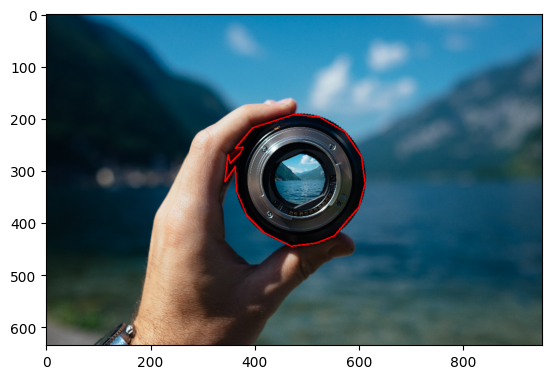

In [34]:
epsilon = 5

list_point = contour_to_list_point(contours[0])

approximate = approximate_contour(list_point,epsilon )

img = cv2.imread("images/lens.png")
img_copy = img.copy()

cv2.drawContours(img_copy,[np.array(approximate)], -1, (0,0,255), 2)
showC(img_copy)

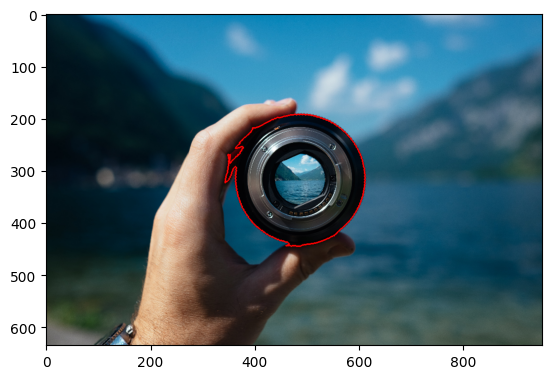

In [35]:
img = cv2.imread("images/lens.png")
img_copy = img.copy()

cv2.drawContours(img_copy,contours[0], -1, (0,0,255), 2)
showC(img_copy)

# **ConvexHull Contour (Algorithm)**
link [https://www.dcs.gla.ac.uk/~pat/52233/slides/Hull1x1.pdf]


In [46]:
def find_lowest_point(list_point):
    
    """
        list_point = [(x1,y1),(x2,y2)]
    """
    
    max_y = 1e8
    lowest_point = ()
    
    for point in list_point:
        if point[1] < max_y:
            max_y = point[1]
            lowest_point = (point[0], point[1])
            
    return  lowest_point
    
def sorted_list_point_angle (list_point, lowest_point)  :
    
    def angle(p):
        
        return np.arctan2(p[1] -lowest_point[1], p[0] -lowest_point[0])
        
    sorted_list_point = sorted(list_point, key = angle)
    
    return sorted_list_point

def cross_product(a,b):
    
    c = [a[1]*b[2] - a[2]*b[1],
         a[2]*b[0] - a[0]*b[2],
         a[0]*b[1] - a[1]*b[0]]
    
    return np.sum(c)

def calc_direction (p1, p2,p3):
    
    """
        p1, p2
        p3 la diem dang xet de xem xem cai diem p2 no co thuoc ConvexHull cua list point khong
    
    """
    direc = np.cross((p1[0] -p2[0], p1[1] -p2[1]), (p3[0] -p1[0], p3[1] -p1[1]))
    
    return direc


def convexHull(list_point):
    
    lowest_point = find_lowest_point (list_point)
    
    sorted_point  = sorted_list_point_angle(list_point, lowest_point)
    
    hull = [sorted_point[0], sorted_point[1]] 
    
    for i in range(2, len(sorted_point)):
        
        while len(hull) > 1 and (calc_direction (hull[-1], hull[-2],sorted_point[i]) <=0):
            hull.pop()
            
        hull.append(sorted_point[i])
    return hull


In [48]:
list_point = contour_to_list_point(contours[0])
hull = convexHull(list_point)

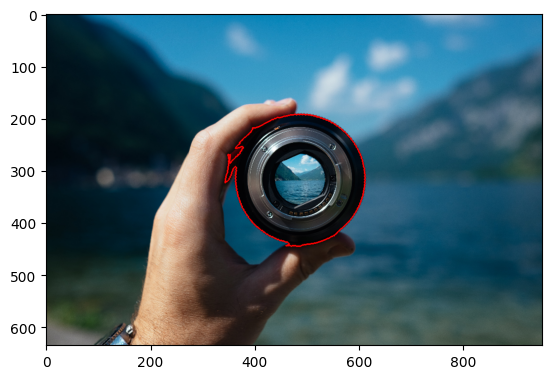

In [40]:
img = cv2.imread("images/lens.png")
img_copy = img.copy()

cv2.drawContours(img_copy,contours[0], -1, (0,0,255), 2)
showC(img_copy)

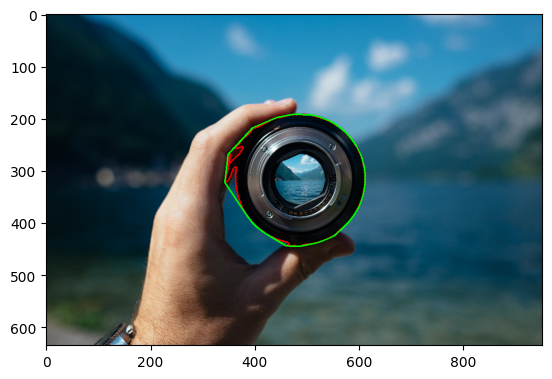

In [41]:
# img = cv2.imread("images/lens.png")
# img_copy = img.copy()

cv2.drawContours(img_copy,[np.array(hull)], -1, (0,255,0), 2)
showC(img_copy)